STOP SIGN DETECTOR - custom model

In [4]:
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [5]:
## path to training data
dir_1 = './STOP_tub'
dir_0 = './NOT_STOP_tub'

In [6]:
img = []
labels = []
size = (160, 70)

In [7]:
## load data when car needs to stop
for file in os.listdir(dir_1):
    path = os.path.join(dir_1, file)
    i = Image.open(path)
    width, height = i.size
    i = i.crop((0, 50, width, height))
    i = i.resize(size) 
    i = np.array(i)
    img.append(i)
    labels.append(1)

In [8]:
## load data when car shouldn't stop
for file in os.listdir(dir_0):
    path = os.path.join(dir_0, file)
    i = Image.open(path)
    width, height = i.size
    i = i.crop((0, 50, width, height))
    i = i.resize(size) 
    i = np.array(i)
    img.append(i)
    labels.append(0)

label:  1


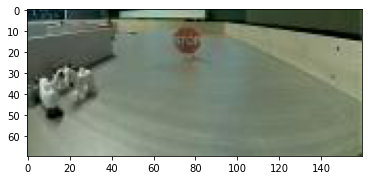

In [9]:
# display loaded data
print("label: ", labels[88])
plt.imshow(img[88])
plt.show()


label:  0


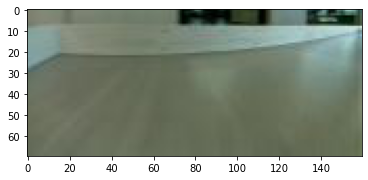

In [10]:
plt.imshow(img[2000])
plt.show
print("label: ", labels[2000])

In [11]:
img = np.array(img)
labels=np.array(labels)

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

In [13]:
## split data for train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(img, labels, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
## encode categorical labels
num_classes = 2 
y_train_encoded = to_categorical(y_train, num_classes)
y_valid_encoded = to_categorical(y_valid, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [15]:
## build a model
def core_cnn_layers(img_in, drop):
    x = Conv2D(32, (3, 3), activation='relu')(img_in)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dropout(drop)(x)
    return x

class CustomModel:
    def create_classification_model(self, input_shape, num_classes):
        drop = 0.2
        img_in = Input(shape=input_shape, name='img_in')
        x = core_cnn_layers(img_in, drop)  # Zakładam, że masz funkcję core_cnn_layers
        x = Dense(100, activation='relu', name='dense_1')(x)
        x = Dropout(drop)(x)
        x = Dense(50, activation='relu', name='dense_2')(x)
        x = Dropout(drop)(x)

        classification_output = Dense(num_classes, activation='softmax', name='classification_output')(x)

        model = Model(inputs=img_in, outputs=classification_output)
        return model


In [16]:
## create a callback to display training information
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}:")
        print(f" - Loss: {logs['loss']:.4f}")
        print(f" - Accuracy: {logs['accuracy']:.4f}")
        print(f" - Validation Loss: {logs['val_loss']:.4f}")
        print(f" - Validation Accuracy: {logs['val_accuracy']:.4f}")

my_callback = MyCallback()

In [17]:
## fit the model to the data
model = CustomModel()
input_shape = (70, 160, 3)
classification_model = model.create_classification_model(input_shape, num_classes)

classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
history = classification_model.fit(X_train, y_train_encoded, epochs=epochs, validation_data=(X_valid, y_valid_encoded), callbacks=[my_callback])

## evaluate the model
loss, accuracy = classification_model.evaluate(X_test, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
84/84 [==============================] - ETA: 0s - loss: 1.5346 - accuracy: 0.8765Epoch 1:
 - Loss: 1.5346
 - Accuracy: 0.8765
 - Validation Loss: 0.0579
 - Validation Accuracy: 0.9773
84/84 [==============================] - 26s 268ms/step - loss: 1.5346 - accuracy: 0.8765 - val_loss: 0.0579 - val_accuracy: 0.9773
Epoch 2/10
84/84 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9888Epoch 2:
 - Loss: 0.0321
 - Accuracy: 0.9888
 - Validation Loss: 0.0015
 - Validation Accuracy: 1.0000
84/84 [==============================] - 21s 251ms/step - loss: 0.0321 - accuracy: 0.9888 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
84/84 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9978Epoch 3:
 - Loss: 0.0075
 - Accuracy: 0.9978
 - Validation Loss: 0.0005
 - Validation Accuracy: 1.0000
84/84 [==============================] - 27s 316ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 4.5585e-04 - val_accuracy: 1.0000
Epoch 4/10
8

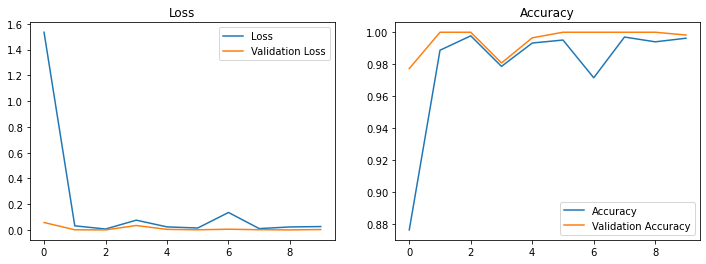

In [18]:
## plot stats from the training process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

1/1 [==============================] - 0s 358ms/step


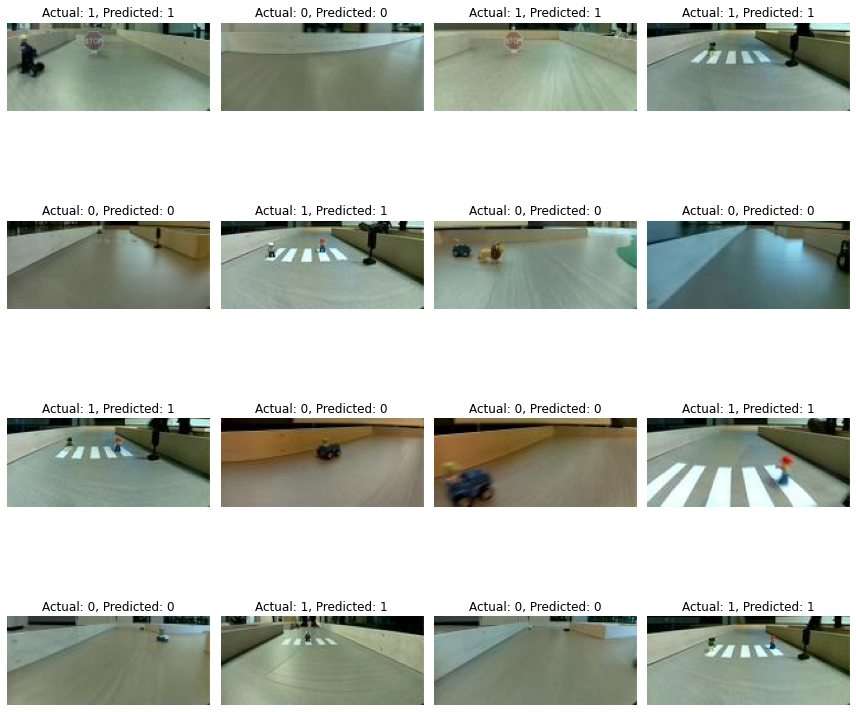

In [19]:
## plot examples of the models performance on the training data
num_samples = 16
sample_indices = random.sample(range(len(img)), num_samples)

sample_images = img[sample_indices]
sample_labels = labels[sample_indices]
predictions = classification_model.predict(sample_images)

predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Actual: {sample_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 84ms/step


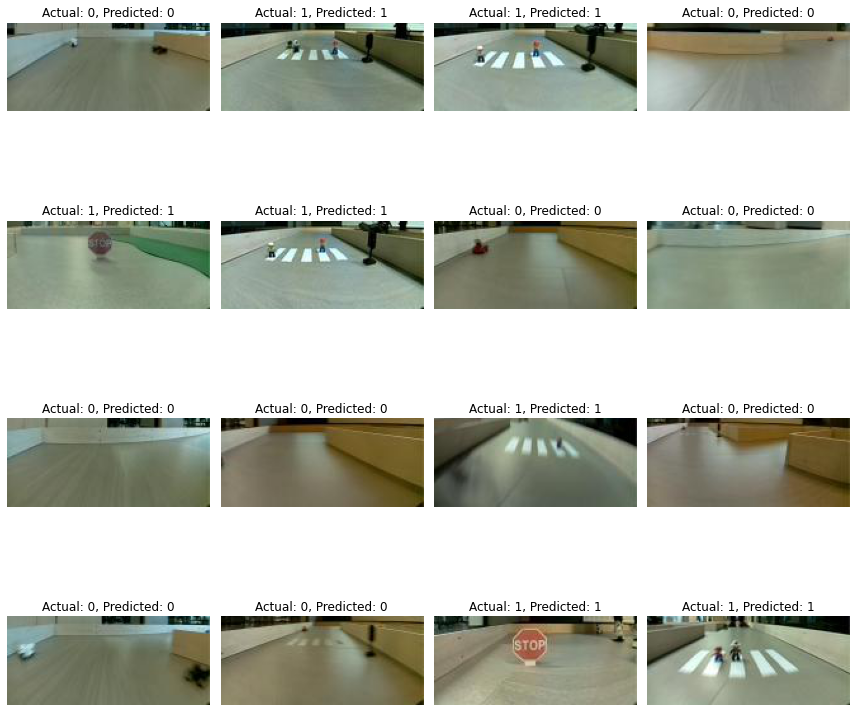

In [20]:
## plot examples of the models performance on the test data

num_samples = 16
sample_indices = random.sample(range(len(X_test)), num_samples)

sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]
predictions = classification_model.predict(sample_images)

predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'Actual: {sample_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
## save the trained model
classification_model.save('stop_model_2.h5')
loaded_model = tf.keras.models.load_model('stop_model_2.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

with open('stop_model_2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\48732\AppData\Local\Temp\tmpz6hk96r6\assets


INFO:tensorflow:Assets written to: C:\Users\48732\AppData\Local\Temp\tmpz6hk96r6\assets
